# Introducción a TF

In [43]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [2]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [3]:
res = tf.multiply(x1,x2)
res

<tf.Tensor 'Mul:0' shape=(5,) dtype=int32>

In [4]:
sess = tf.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [5]:
with tf.Session() as sess:
    output=sess.run(res)
    print(output)

[ 6 14 24 36 50]


In [6]:
config = tf.ConfigProto(log_device_placement=True)
config = tf.ConfigProto(allow_soft_placement=True)

# Dataset imgs

In [1]:
import os
import skimage.io
import numpy as np
print(skimage.__version__)

0.17.2


In [2]:
def load_ml_data(data_dir):
    dirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,d))]
    labels, images = [], []
    for d in dirs:
        label_dir = os.path.join(data_dir,d)
        filenames = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in filenames:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels

In [3]:
main_dir = "../datasets/belgian/"
train_data_dir = os.path.join(main_dir,"Training")
test_data_dir = os.path.join(main_dir,"Testing")

In [4]:
imgs, labels = load_ml_data(train_data_dir)
print(len(imgs))

4575


In [5]:
images, labels = np.array(imgs), np.array(labels)

/opt/anaconda3/envs/tf15/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [21]:
images[0]

array([[[ 47,  52,  59],
        [ 35,  64,  72],
        [ 53, 104, 112],
        ...,
        [ 75,  82,  60],
        [ 72,  77,  55],
        [ 68,  71,  50]],

       [[ 46,  51,  57],
        [ 38,  66,  74],
        [ 58, 109, 115],
        ...,
        [ 74,  84,  62],
        [ 76,  84,  62],
        [ 76,  83,  61]],

       [[ 44,  50,  56],
        [ 44,  71,  79],
        [ 59, 109, 115],
        ...,
        [ 71,  83,  61],
        [ 74,  84,  63],
        [ 75,  84,  63]],

       ...,

       [[120, 141, 139],
        [119, 144, 138],
        [114, 141, 131],
        ...,
        [ 33,  30,  27],
        [ 32,  30,  28],
        [ 30,  30,  28]],

       [[133, 151, 145],
        [124, 146, 138],
        [111, 137, 127],
        ...,
        [ 31,  30,  25],
        [ 32,  32,  27],
        [ 33,  33,  30]],

       [[139, 158, 147],
        [124, 146, 137],
        [107, 132, 123],
        ...,
        [ 31,  30,  23],
        [ 33,  33,  27],
        [ 35,  36,  31]]

In [22]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [23]:
images.itemsize

8

In [24]:
images.nbytes

36600

In [26]:
import matplotlib.pyplot as plt

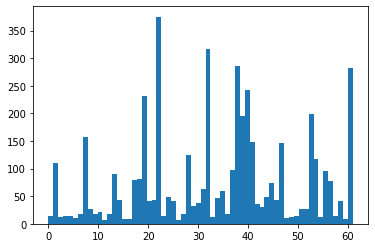

In [27]:
plt.hist(labels, len(set(labels)))
plt.show()

In [28]:
import random

In [29]:
rand_signs = random.sample(range(0,len(labels)),6)
rand_signs

[2053, 2751, 220, 473, 2272, 1352]

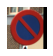

Forma: (190, 177, 3), min: 0, max: 255


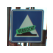

Forma: (202, 203, 3), min: 1, max: 255


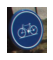

Forma: (145, 124, 3), min: 3, max: 255


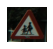

Forma: (112, 127, 3), min: 0, max: 171


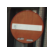

Forma: (228, 226, 3), min: 9, max: 224


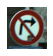

Forma: (99, 93, 3), min: 0, max: 255


In [32]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=.5)
    plt.show()
    print("Forma: {0}, min: {1}, max: {2}".format(temp_im.shape, temp_im.min(), temp_im.max()))

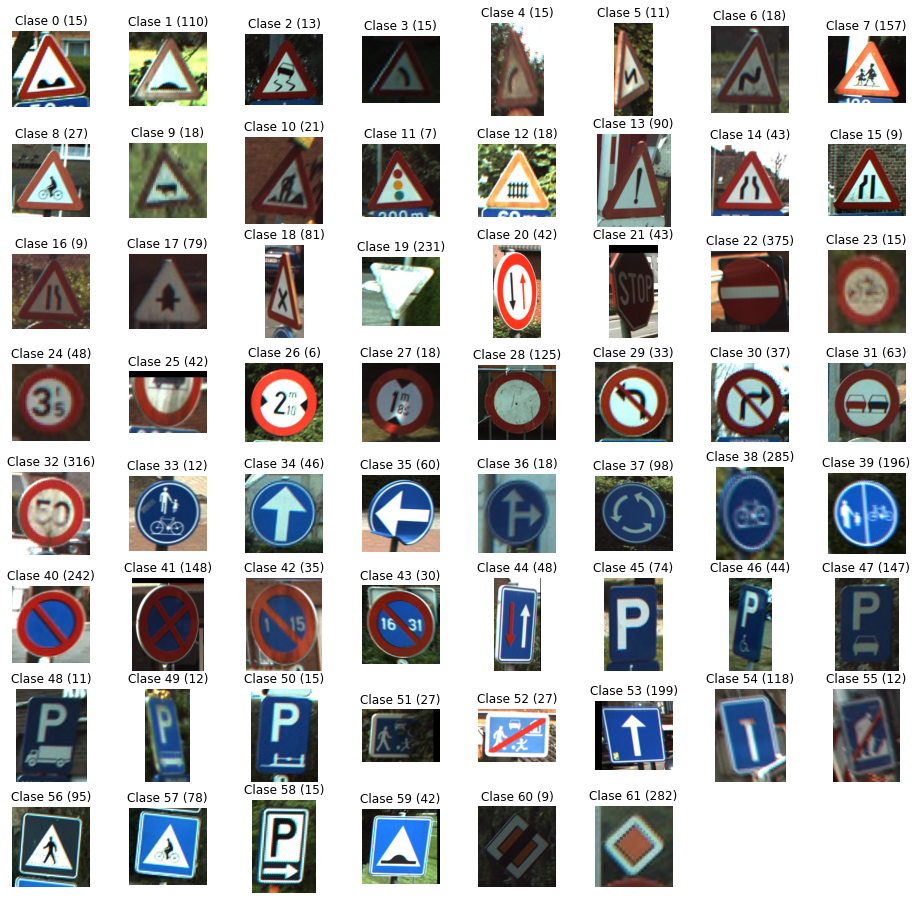

In [33]:
unique_labels=set(labels)
plt.figure(figsize=(16,16))
i=1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i+=1
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=.5)
plt.show()

# Preprocesado de IMGS
* No todas las imgs son del mismo size
* Tenemos 62 clases
* Distribución de señales de tráfico no es uniforme

In [7]:
from skimage import transform

In [35]:
w,h = 9999, 9999
for img in images:
    h=min(img.shape[0],h)
    w=min(img.shape[1],w)
print(w, h)

20 22


In [8]:
images30 = [transform.resize(image, (30,30)) for image in images]

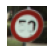

Forma: (30, 30, 3), min: 0.047516339869281075, max: 0.8745098039215686


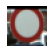

Forma: (30, 30, 3), min: 0.0, max: 0.988888888888889


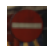

Forma: (30, 30, 3), min: 0.043137254901960784, max: 0.5857516339869282


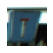

Forma: (30, 30, 3), min: 0.01133333333333324, max: 0.9967973856209151


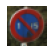

Forma: (30, 30, 3), min: 0.05339869281045735, max: 0.810065359477124


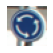

Forma: (30, 30, 3), min: 0.0816993464052287, max: 0.9973856209150326


In [38]:
rand_signs = random.sample(range(0,len(labels)),6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=.5)
    plt.show()
    print("Forma: {0}, min: {1}, max: {2}".format(temp_im.shape, temp_im.min(), temp_im.max()))

In [9]:
from skimage.color import rgb2gray

In [10]:
images30 = rgb2gray(np.array(images30))

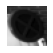

Forma: (30, 30), min: 0.13414008823529425, max: 0.9921568627450981


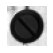

Forma: (30, 30), min: 0.08398454248366011, max: 0.801225797385621


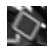

Forma: (30, 30), min: 0.06101671764705859, max: 0.9928965389978215


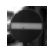

Forma: (30, 30), min: 0.07794647320261437, max: 0.996078431372549


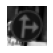

Forma: (30, 30), min: 0.14112844880174305, max: 0.9028176078431358


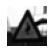

Forma: (30, 30), min: 0.09287723747276697, max: 0.9989681808278867


In [41]:
rand_signs = random.sample(range(0,len(labels)),6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im,cmap="gray")
    plt.subplots_adjust(wspace=.5)
    plt.show()
    print("Forma: {0}, min: {1}, max: {2}".format(temp_im.shape, temp_im.min(), temp_im.max()))

# Model DL - TF

In [15]:
import os
import skimage.io
import numpy as np
from skimage import transform
from skimage.color import rgb2gray
import tensorflow as tf
import random
import matplotlib.pyplot as plt
print(tf.__version__)

1.15.0


In [18]:
def load_ml_data(data_dir):
    dirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,d))]
    labels, images = [], []
    for d in dirs:
        label_dir = os.path.join(data_dir,d)
        filenames = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in filenames:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels

def load_training_data():
    main_dir = "../datasets/belgian/"
    train_data_dir = os.path.join(main_dir,"Training")
    images, labels = load_ml_data(train_data_dir)
    images, labels = np.array(images), np.array(labels)
    images30 = [transform.resize(image, (30,30)) for image in images]
    images30 = rgb2gray(np.array(images30))
    return images30, labels

def load_testing_data():
    main_dir = "../datasets/belgian/"
    test_data_dir = os.path.join(main_dir,"Testing")
    images, labels = load_ml_data(test_data_dir)
    images, labels = np.array(images), np.array(labels)
    images30 = [transform.resize(image, (30,30)) for image in images]
    images30 = rgb2gray(np.array(images30))
    return images30, labels

In [3]:
images30, labels = load_training_data()
print(images30.shape)
print(labels.shape)

/opt/anaconda3/envs/tf15/lib/python3.6/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


(4575, 30, 30)
(4575,)


In [4]:
x = tf.placeholder(dtype=tf.float32,shape=[None,30,30])
y = tf.placeholder(dtype=tf.int32,shape=[None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat,62,tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [45]:
images_flat

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [46]:
logits

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

In [47]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [48]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [14]:
labels.shape()

(4575,)

In [19]:
labels.reshape(4575,1)

array([[31],
       [31],
       [31],
       ...,
       [44],
       [44],
       [44]])

In [5]:
tf.set_random_seed(1234)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(1501):
    _, loss_ac, accuracy_val = sess.run([train_opt, loss, accuracy], 
                               feed_dict={
                                   x: images30,
                                   y: list(labels)
                               })
    if i%50==0:
        print(f"Epoch {i} Accuracy_val: {accuracy_val} Loss:{loss_ac}")
        print("-"*60)

Epoch 0 Accuracy_val: 6.953005313873291 Loss:4.215837478637695
------------------------------------------------------------
Epoch 50 Accuracy_val: 38.289615631103516 Loss:3.2395179271698
------------------------------------------------------------
Epoch 100 Accuracy_val: 37.70185852050781 Loss:2.9450197219848633
------------------------------------------------------------
Epoch 150 Accuracy_val: 37.343170166015625 Loss:2.8014745712280273
------------------------------------------------------------
Epoch 200 Accuracy_val: 37.064918518066406 Loss:2.7106592655181885
------------------------------------------------------------
Epoch 250 Accuracy_val: 36.70579147338867 Loss:2.6458563804626465
------------------------------------------------------------
Epoch 300 Accuracy_val: 36.084590911865234 Loss:2.596513032913208
------------------------------------------------------------
Epoch 350 Accuracy_val: 35.541202545166016 Loss:2.557434558868408
-------------------------------------------------

# Evaluation

In [11]:
sample_idx = random.sample(range(len(images30)),16)
samples_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [13]:
prediction = sess.run([final_pred], feed_dict={x:samples_images})[0]
print(prediction)

[19  7  1 61  0 61 38 35  0 45 61 45  7 38 53 38]


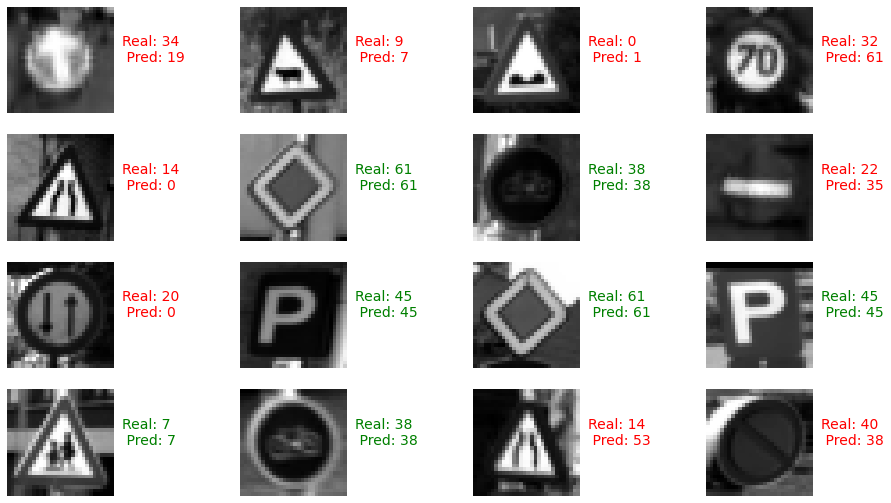

In [17]:
plt.figure(figsize=(16,9))
for i in range(len(samples_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(4,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32,15,f"Real: {truth}\n Pred: {predi}",fontsize=14,color=color)
    plt.imshow(samples_images[i],cmap="gray")
plt.show()

In [19]:
test_images30, test_labels = load_testing_data()

/opt/anaconda3/envs/tf15/lib/python3.6/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [20]:
pred_test = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [22]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, pred_test)])
match_count

1278

In [23]:
acc_test = match_count/len(test_labels)
print(f"Acc test: {acc_test}")

Acc test: 0.5071428571428571
